8.0  students reach over 88 points
0.0  students reach over 96 points
58.0  students reach over 96 points


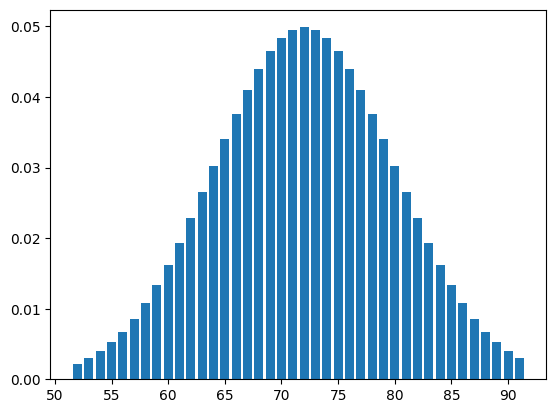

In [14]:
# 45. The average result of the exam is 72, the standard deviation of points is 8, 
# and the distribution of points follows the normal distribution.  
# If 400 students participate in the exam: 


#Note that Gaussian distribution is a continous function, but exam points are typically discrete 
#(they can have only certain values, like full integers)
#If assuming that 88 points is a discrete value --> "more than 88" means 89 or more
#If assuming that 88 points is a continous value and is only expressed with the accuracy of full integer (rounded)
#---> "88 points or more" means points over 88.5
import numpy as np
import matplotlib.pyplot as plt
def gaussian(x):
    mu = 72
    sigma = 8
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-1/2*((x-mu)/sigma)**2)

x = np.arange(72-20,72+20,1)
plt.bar(x,gaussian(x))
plt.show


# a) How many of them reach more than 88? 
import scipy
I = scipy.integrate.quad(gaussian,88.5,np.inf)
print(np.round(I[0]*400,0),' students reach over 88 points')

# b) How many of them reach more than 96? 
import scipy
I = scipy.integrate.quad(gaussian,96.5,np.inf)
print(np.round(I[0]*400,0),' students reach over 96 points')

# c) How many of them get less than 64 points?
import scipy
I = scipy.integrate.quad(gaussian,-np.inf,63.5)
print(np.round(I[0]*400,0),' students reach over 96 points')

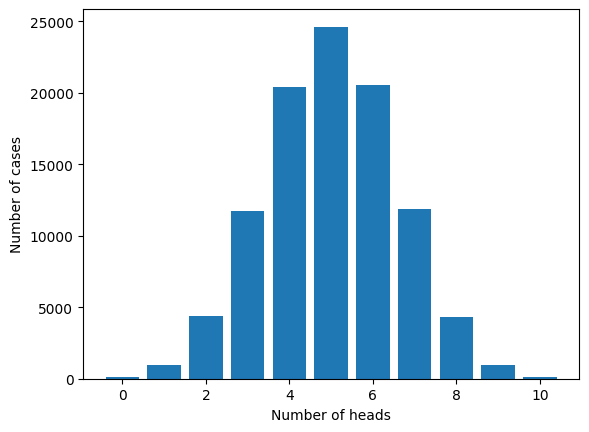

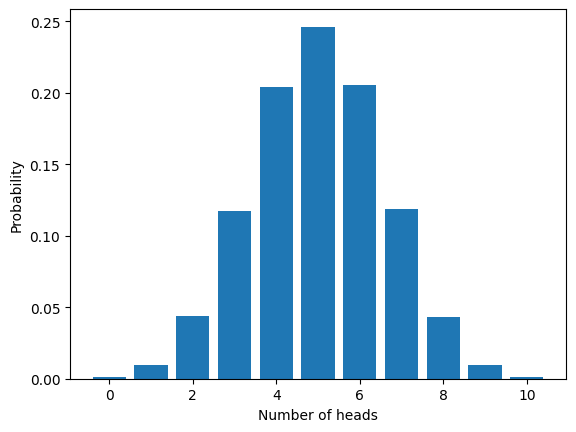

In [ ]:
# 47. Coin flipping has the binomial distribution. 
# There are two possible outcomes: heads and tails and they have an equal propability. 
# Write a Python simulation for number of heads when you flip the coin ten times. 
# Investigate the distribution of number of tails, does it follow some well-known distribution function?

#Coin flip simulator, two ouputs 1 = heads, 0 = tails
#print(np.random.binomial(1,0.5,1)) #Value (one out of two), probability, number of experiments

#print(np.random.binomial(1,0.5,10)) #Ten flips 

#For each 10 coin flip experiments there are 11 different possible outcomes for number of heads:
#(0,1,2,3,4,5,6,7,8,9, or 10 heads)

#Let's write a simulation

#Define a result matrix:
result = np.zeros([11,2]) #Eleven possible outcomes and number of cases for each
result[:,0] = np.arange(0,11,1)

#Let's repeat the experiment n times
n = 100000
for i in range(n):
    j = int(np.sum(np.random.binomial(1,0.5,10))) #Sum of experiment gives the number of heads
    result[j,1] = result[j,1] + 1


plt.bar(result[:,0],result[:,1])
plt.xlabel('Number of heads')
plt.ylabel('Number of cases')
plt.show()

#Let's normalize to get the actual probability

plt.bar(result[:,0],result[:,1]/n)
plt.xlabel('Number of heads')
plt.ylabel('Probability')
plt.show()

#Distributions seems normal distribution


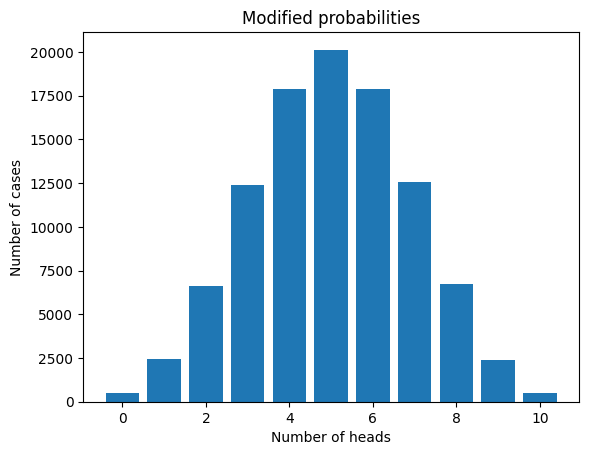

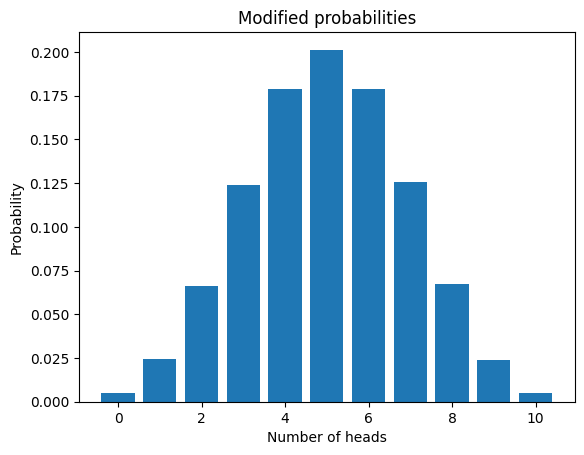

In [120]:
# 48. Repeat the same task, but now assume that the 
# propability of heads/tails depends on the result of previous flip according to rule
# that eafter heads (tails) the probability of heads (tails) is 60% and probability of tails (heads) is 40%. 

#Let's write a function for this type of probability in coin flipping

def weighted_binomial(N): #N is number of flips'
    flip_res = np.zeros([N,1])
    p = 0.5 #Initial probability (50% - 50% for heads - tails)
    for i in range(N): #repeating N times
        f = np.random.binomial(1,p,1) #flip simulator
        flip_res[i] = f #Write results to results array
        #Varying probabilities:
        if f == 1: #Heads
            p = 0.6 #Probability of heads is 0.6 (60%) if the previous flip was heads
        elif f == 0: #Tails
            p = 0.4 #Probability od heads is 0.4 (40%) --> probability of tails is 0.6 (60%)
    return flip_res

N = 10
#Define a result matrix:
result = np.zeros([11,2]) #Eleven possible outcomes and number of cases for each
result[:,0] = np.arange(0,11,1)

#Let's repeat the experiment n times
n = 100000
for i in range(n):
    j = int(np.sum(weighted_binomial(N))) #Sum of experiment gives the number of heads
    result[j,1] = result[j,1] + 1


plt.bar(result[:,0],result[:,1])
plt.xlabel('Number of heads')
plt.ylabel('Number of cases')
plt.title('Modified probabilities')
plt.show()

#Let's normalize to get the actual probability

plt.bar(result[:,0],result[:,1]/n)
plt.xlabel('Number of heads')
plt.ylabel('Probability')
plt.title('Modified probabilities')
plt.show()


In [ ]:
# 49. Repeat once more, but now assume that heads (tails) always cumulative adds 5% to the probability of heads (tails). 
# For example, if the first three flips are heads the probability of heads for fouth flip is then 50%+5%+5%+5% = 65%, 
# but if the fourth one is tails then the probability of heads for fifth flip is 50%+5%+5%+5% - 5% = 60%


In [ ]:

# 50. Write a Python code to simulate the probability density function of total 
# sum of pips (numbers from 1 to 6) when rolling a dice 100 times. 